In [1]:
#What factors enabled some passengers to survive the titanic disaster?
#Use logistic Regression to predict which passengers would have survived
#Then, look at the data features of the survivors to learn what would have impacted their survival?

#import libaries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
#read in the data

titanic = pd.read_csv('https://raw.githubusercontent.com/avinashjairam/avinashjairam.github.io/master/titanic.csv')

In [3]:
#taking a peek at the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Learn about our data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#What data types do we have?
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#look at the shape - 891 rows and 12 columns
titanic.shape

(891, 12)

In [7]:
#generate some description statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

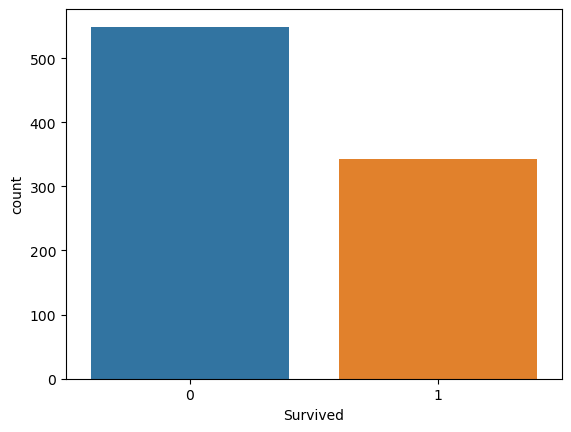

In [8]:
#How many passengers actually survived? - countplot from seaborn

sns.countplot(x='Survived', data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

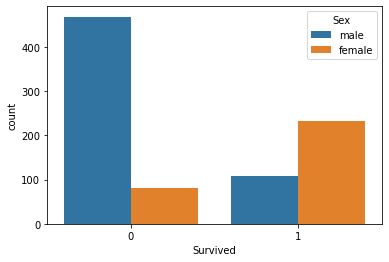

In [9]:
#Suvivors - Males vs Females
sns.countplot(x='Survived', data = titanic, hue = 'Sex')

In [10]:
#Let's check for this missing values
titanic.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#How many missing data values for each column?
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

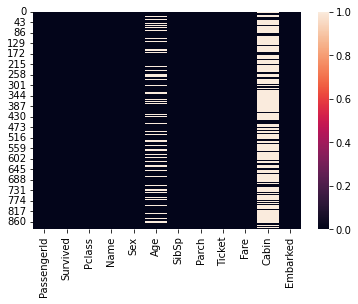

In [12]:
#heatmap to show the missing values

sns.heatmap(titanic.isna())

In [13]:
#how many records in the Age column?
len(titanic['Age'])

891

In [14]:
#how much data is missing from the age and cabin columns

titanic['Age'].isna().sum() /  len(titanic['Age']) * 100

19.865319865319865

In [15]:
#What percentage of the Cabin data is missing?
titanic['Cabin'].isna().sum() /  len(titanic['Cabin']) * 100

77.10437710437711

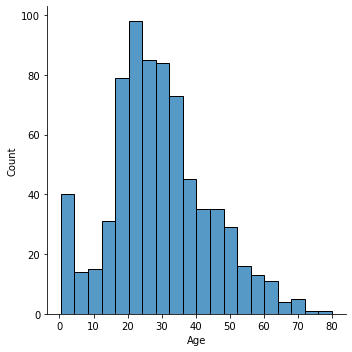

In [16]:
#Distribution of the ages

sns.displot(x='Age', data=titanic)

In [17]:
# what's the average age?
titanic['Age'].mean()

29.69911764705882

In [18]:
#Replace all of the missing age values with the mean
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True )

In [19]:
titanic['Age'].isna().sum()

0

<AxesSubplot:>

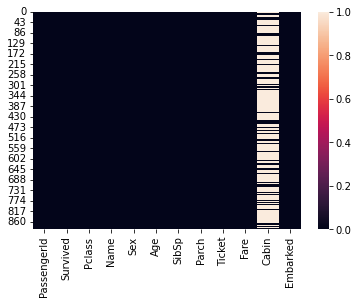

In [20]:
#heatmap to show the missing values

sns.heatmap(titanic.isna())

In [21]:
#drop the cabin column
titanic.drop('Cabin', axis = 1, inplace = True)

<AxesSubplot:>

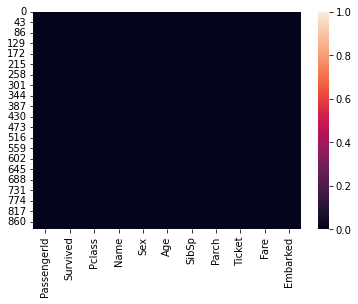

In [22]:
#heatmap to show the missing values
sns.heatmap(titanic.isna())

In [23]:
#taking another look at the dataset
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [24]:
#One hot encoding - our model needs numeric data as the input. Hence, we need to convert the categorical data to numerical
pd.get_dummies(titanic['Sex'], drop_first = True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [25]:
#converting the data in the sex column to 0s and 1s
titanic['Sex'] = pd.get_dummies(titanic['Sex'], drop_first = True)

In [26]:
#the sex column has been updated
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C


In [27]:
#Drop unecessary columns

titanic.drop(['Name', 'PassengerId', 'Embarked', 'Ticket'], axis = 1, inplace = True)

In [28]:
#verifying that the column has been removed
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


In [29]:
#Separting the Features from the labels, Separating X from y 
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [30]:
#taking a look at the features
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,1,0,7.2500
1,1,0,38.000000,1,0,71.2833
2,3,0,26.000000,0,0,7.9250
3,1,0,35.000000,1,0,53.1000
4,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000
887,1,0,19.000000,0,0,30.0000
888,3,0,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [31]:
#extracting the labels
y = titanic[['Survived']]

In [32]:
#taking a look at the labels
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [33]:
#Split your data into training and testing sets

from sklearn.model_selection import train_test_split


#Splitting the dataset into the training and test sets - 70% of the data is used for training and 30% is used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [34]:
#Creating a Linear Regression Model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

#Training the Linear Regression model using the training data
lr.fit(X_train, y_train)

/Users/minheekwon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [35]:
#Making predictions on the Test dataset
y_pred = lr.predict(X_test)

In [36]:
#Generating the confusion matrix using scikit-learn's confusion matrix method
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[147,  27],
       [ 26,  68]])

In [37]:
#Generating the confusion matrix as a dataframe. 
pd.DataFrame( confusion_matrix(y_test, y_pred), columns = ['Actual Positive (Lived)', 'Acutal Negative (Died)'], index = [ 'Predicted Positive (Lived)', 'Predicted Negative (Died)']          )

,Actual Positive (Lived),Acutal Negative (Died)
Predicted Positive (Lived),147,27
Predicted Negative (Died),26,68


In [38]:
#Generate Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       174
           1       0.72      0.72      0.72        94

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [39]:
#converting the prediction to a dataframe
y_pred_df = pd.DataFrame(y_pred, columns = ['Predicted Survival'])


In [40]:
#dataframe of predicted values
y_pred_df

,Predicted Survival
0,0
1,0
2,0
3,1
4,1
...,...
263,1
264,0
265,1
266,1


In [41]:
#creating a merged dataframe of test data and the predictions
df = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True), y_pred_df.reset_index(drop=True)], axis=1)

In [42]:
#We can now compare our predictions with the actual data
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Predicted Survival
0,3,1,35.000000,0,0,7.1250,0,0
1,3,1,20.000000,0,0,7.0500,0,0
2,3,1,26.000000,0,0,7.8958,0,0
3,1,0,58.000000,0,0,146.5208,1,1
4,1,0,35.000000,1,0,83.4750,1,1
...,...,...,...,...,...,...,...,...
263,1,0,31.000000,0,2,164.8667,1,1
264,3,0,29.699118,8,2,69.5500,0,0
265,3,0,41.000000,0,2,20.2125,0,1
266,3,0,31.000000,0,0,7.8542,0,1
